# Homework-4

In [2]:
import instaloader
from pprint import pprint
import tweepy
from pprint import pprint 
from tweepy import Stream
from tweepy.streaming import StreamListener
import csv
import numpy as np
import operator
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os.path
from os import path
import ast

In [3]:
#Consumer Key (API Key), Consumer Secret (API Secret)
auth = tweepy.OAuthHandler('ZKkGRRKUBGY9NbDtuzZk6lVy6','Zx3v5FaMqXM907KilyTZdGWFiVlkuyVMi636vRQynHvKO3EdBR')
# Access Token, Access Token Secret
auth.set_access_token('2878516730-7GkdTlpexHuZL0fg3vlCBcJpeUWnAuSqTKTew6z','kwEWM9ixk4ylcTXCIYnV9kc9hFmQwvsyprMJtSXAEA0aY')

api = tweepy.API(auth)
if (not api):
    print("Authentication failed :(")
else:
    print("Authentication successfull!!! :D")

Authentication successfull!!! :D


In [4]:
def downloadDatasetTwitter(username):
  if path.exists('tweets'+username+'.csv'):
    print('tweets'+username+'.csv'+" file already exists")
    return
  print("Downloading tweets for %s. Check %s "%(username,'tweets'+username+'.csv'))
  csvFile = open('tweets'+username+'.csv', 'w')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(["Date","ID", "Full Text","Retweet Count","Like Count","HashTags","Tweet Type"])
  for tweet in tweepy.Cursor(api.user_timeline, id=username,include_entities=True,tweet_mode = 'extended').items(3200):
    hashTags=[]
    for hashtag in tweet.entities["hashtags"]:
      hashTags.append(hashtag["text"])
      
    mediatype="Text"
    if hasattr(tweet, "extended_entities"):
      media=tweet.extended_entities.get("media",None)
      if media:
        mediatype=media[0]["type"]
    elif hasattr(tweet, "entities"):
      media=tweet.entities.get("media",None)
      if media:
        mediatype=media[0]["type"]
        
    csvWriter.writerow([tweet.created_at,tweet.id_str, tweet.full_text,tweet.retweet_count,tweet.favorite_count,hashTags,mediatype])


In [5]:
def printTweet(tweet):
  print("              ===============================================")
  print("              Date: ",tweet[0])
  print("              ===============================================")
  print("              ID: ",tweet[1])
  print("              ===============================================")
  print("              Caption: ",tweet[2].replace("\n","\n              "))
  print("              ===============================================")
  print("              Likes: ",tweet[4])
  print("              ===============================================")
  print("              Retweets: ",tweet[3])
  print("              ===============================================")
  print("              URL: ","https://twitter.com/statuses/"+str(tweet[1]))
  

In [6]:
usernameBJP="BJP4India"
usernameINC="INCIndia"
tweetsBJP=[]
tweetsINC=[]
retweetCount=[]
likeCount=[]

retweetCountINC=[]
likeCountINC=[]
downloadDatasetTwitter(username=usernameBJP)
downloadDatasetTwitter(username=usernameINC)
tweetsBJP=pd.read_csv("tweetsBJP4India.csv").values
tweetsINC=pd.read_csv("tweetsINCIndia.csv").values
  
print("tweetsBJP",len(tweetsBJP))
print("INCIndia",len(tweetsINC))


tweetsBJP4India.csv file already exists
tweetsINCIndia.csv file already exists
tweetsBJP 3200
INCIndia 3200


## Part-1 Twitter's official API

## Part-1: 1-a
### Most Liked Post of BJP

In [7]:
def mostLiked():
  print("Most liked tweet of BJP")
  index=np.argmax(tweetsBJP[:,4])
  tweet=tweetsBJP[index]
  printTweet(tweet)
  
mostLiked()

Most liked tweet of BJP
              Date:  2019-03-27 12:48:20
              ID:  1110886268408233984
              Caption:  Congress led UPA
              Surgical Strike : Don't do it
              Air Strike: Don't do it
              A-SAT Missile: Don't do it
              
              Modi Sarkar
              Surgical Strike: Go For It
              Air Strike: Go For It
              A-SAT Missile: Go For It
              
              Modi Hai To Mumkin Hai. #MissionShakti
              Likes:  43518
              Retweets:  13820
              URL:  https://twitter.com/statuses/1110886268408233984


## Part-1: 1-b

### Most Retweeted Post of BJP

In [8]:
def mostRetweeted():
  print("Most Retweeted tweet of BJP")
  index=np.argmax(tweetsBJP[:,3])
  tweet=tweetsBJP[index]
  printTweet(tweet)
mostRetweeted()

Most Retweeted tweet of BJP
              Date:  2019-03-16 04:02:01
              ID:  1106767552351559680
              Caption:  RT @narendramodi: Your Chowkidar is standing firm &amp; serving the nation.
              
              But, I am not alone.
              
              Everyone who is fighting corruption, dirt, s…
              Likes:  0
              Retweets:  56321
              URL:  https://twitter.com/statuses/1106767552351559680


## Part-1: 1-c

### 5 Most Popular Twees BJP

In [28]:
def popularTweetsBJP():
  #giving more weightage to retweet than like
  #popularity = 2*retweet_count+likes
  popularity={}
  idVstweet={}
  for tweet in tweetsBJP:
    tid=tweet[1]
    retweet_count=tweet[3]
    like_count=tweet[4]
    popularity[tid]=2*retweet_count+like_count
    idVstweet[tid]=tweet
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pTweetsIdsVsPop=sorted_d[:5]
  print("Popular tweets BJP: ")
  i=1
  for ptweet in pTweetsIdsVsPop:
    print("Tweet-",i," ###############################################################")
    printTweet(idVstweet[ptweet[0]])
    i+=1
  
popularTweetsBJP()

Popular tweets BJP: 
Tweet- 1  ###############################################################
              Date:  2019-03-16 04:02:01
              ID:  1106767552351559680
              Caption:  RT @narendramodi: Your Chowkidar is standing firm &amp; serving the nation.
              
              But, I am not alone.
              
              Everyone who is fighting corruption, dirt, s…
              Likes:  0
              Retweets:  56321
              URL:  https://twitter.com/statuses/1106767552351559680
Tweet- 2  ###############################################################
              Date:  2019-04-06 11:50:30
              ID:  1114495595421376512
              Caption:  आज तक ने प्रधानमंत्री श्री नरेन्द्र मोदी के भाषण पर दिखाई गलत खबर।
              
              आखिर क्यों? https://t.co/U2KZlMFf7b
              Likes:  38245
              Retweets:  18226
              URL:  https://twitter.com/statuses/1114495595421376512
Tweet- 3  ############################

## Part-1: 1-d
### 5 Most used HashTags BJP

In [29]:
def mostFreqHashTagsBJP():
  print("Most frequent hashtags used by BJP's official handle")
  allHashTags=[]
  for tweet in tweetsBJP:
    allHashTags+=ast.literal_eval(tweet[-2])
   
  hashTagsCount=np.unique(allHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("====================================")
  print("%20s | %4s"%("Hashtag","Frequency"))
  print("====================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%20s | %4d"%(hashtag,count))
  
mostFreqHashTagsBJP()

Most frequent hashtags used by BJP's official handle
             Hashtag | Frequency
  BJPSankalpPatr2019 |  139
    IsBaarNaMoPhirSe |  134
      IsBaarPhirModi |  123
       IndiaWithNaMo |  112
      DeshKeLiyeModi |  102


## Part-1: 2-a

### Pie chart representing the share of images in the tweets as compared to videos and text-only tweets (INC).

Tweets consist of images : 1539/3200 
('Text', 'animated_gif', 'photo', 'video') [1305    1 1539  355]


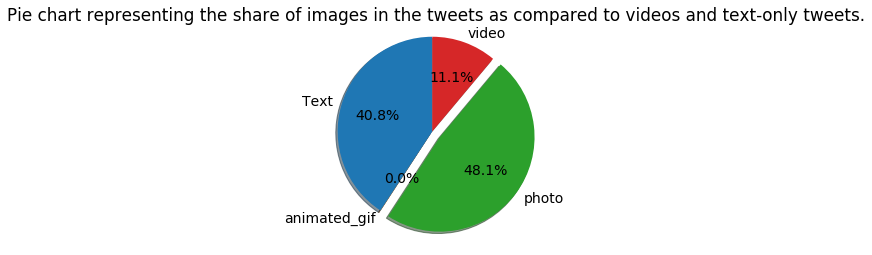

In [11]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0
def imageOrVidOrText():
  print("=================================")
  mediaType=np.unique(tweetsINC[:,-1],return_counts=True)
  for ind,mt in enumerate(mediaType[0]):
    if mt=="photo":
      print("Tweets consist of images : %d/3200 "%(mediaType[1][ind]))
      break
  print("=================================")
  labels= tuple(mediaType[0])
  sizes = mediaType[1]
  explode = (0,0, 0.1,0) 
  fig1, ax1 = plt.subplots()
  print(labels,sizes)
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
  plt.title("Pie chart representing the share of images in the tweets as compared to videos and text-only tweets.")
  ax1.axis('equal')  
imageOrVidOrText()

## Part-1: 2-b
### Word Cloud of the top 1000 most popular tweets (INC)

Most frequent words in INC's popular tweets 
Congress President, Rahul Gandhi, India, Public, People, Rafale, NoMo, BJP,Modi, Govt


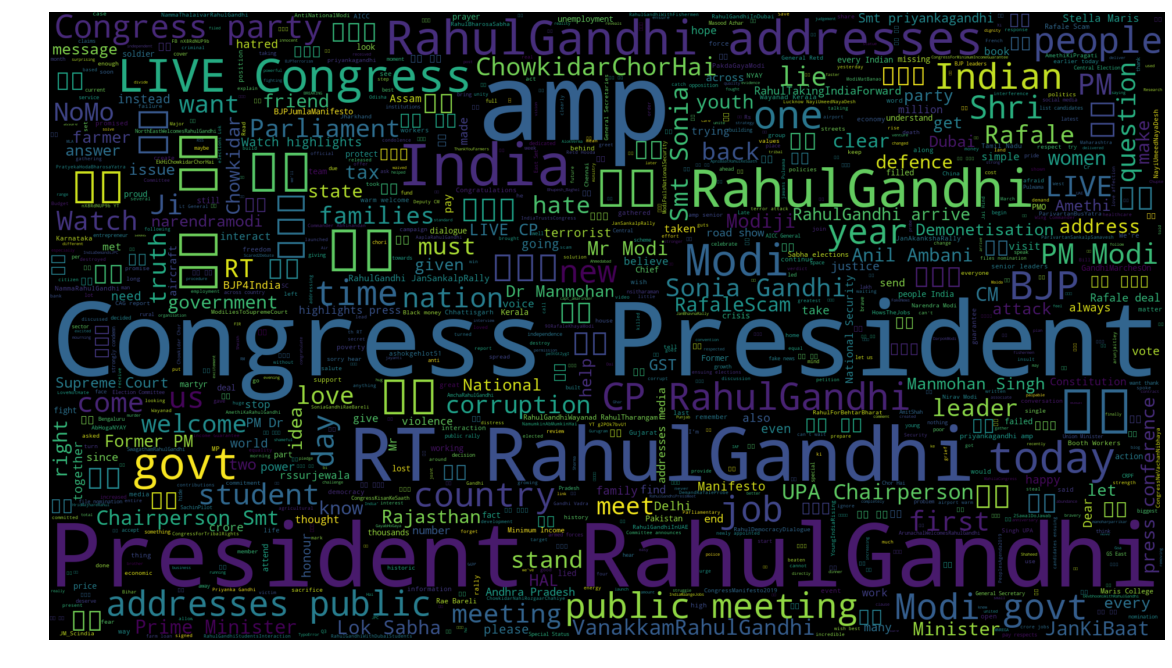

In [12]:
def popularTweetsINC():
  #giving more weightage to retweet than like
  #popularity = 2*retweet_count+likes
  popularity={}
  idVstweet={}
  for tweet in tweetsINC:
    tid=tweet[1]
    retweet_count=tweet[3]
    like_count=tweet[4]
    popularity[tid]=2*retweet_count+like_count
    idVstweet[tid]=tweet
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pTweetsIdsVsPop=sorted_d[:1000]
  para=""
  for ptweet in pTweetsIdsVsPop:
      para+=" "+idVstweet[ptweet[0]][2]
    
  mask = np.array(Image.open("rab.jpg"))
  stopWords=['i','like','say','https','co', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","claim","claimed","however","Responsibility"]
  
  wordcloudSummary = WordCloud(mask=mask,max_words=1000,stopwords=stopWords).generate(para)   
  plt.figure(3,figsize=(20,20))
  plt.imshow(wordcloudSummary, interpolation="bilinear") 
  plt.axis("off") 
  plt.margins(x=0, y=0) 
  print("===========================================")
  print("Most frequent words in INC's popular tweets ")
  print("===========================================")
  print("Congress President, Rahul Gandhi, India, Public, People, Rafale, NoMo, BJP,Modi, Govt")
  plt.show()
  wordcloudSummary.to_file("popularTweetCloud.png")

  
popularTweetsINC()

## Part-1: 2-c
### 5 most used HashTags INC

In [13]:
def mostFreqHashTagsINC():
  print("Most frequent hashtags used by INC's official handle")
  allHashTags=[]
  for tweet in tweetsINC:
    allHashTags+=ast.literal_eval(tweet[-2])
  hashTagsCount=np.unique(allHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("=====================================================================")
  print("%40s | %4s"%("Hashtag","Frequency"))
  print("=====================================================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%40s | %4d"%(hashtag,count))
  
mostFreqHashTagsINC()

Most frequent hashtags used by INC's official handle
                                 Hashtag | Frequency
                        NammaRahulGandhi |   56
                        ChowkidarChorHai |   45
                        YoungIndiaRising |   45
          TelanganasProgressWithCongress |   45
                              RafaleScam |   44


## Part-2: Instagram Scraping using instaloader

In [14]:
L = instaloader.Instaloader()

In [15]:
def downloadDatasetInstagram(username,postsCount=500):
  if path.exists('instaPosts'+username+'.csv'):
    print('instaPosts'+username+'.csv'+" file already exists")
    return
  print("Downloading instagram posts for %s. Check %s "%(username,'instaPosts'+username+'.csv'))
  csvFile = open('instaPosts'+username+'.csv', 'w')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(["Date","ID", "Caption","Likes","Comments","HashTags","isVideo","ShortCode"])
  postsGenerator = instaloader.Profile.from_username(L.context, username).get_posts()  
  count=0
  for post in postsGenerator:
    if count==postsCount:
      break
    csvWriter.writerow([post.date,post._full_metadata["id"], post.caption,post.likes,post.comments,post.caption_hashtags,post.is_video,post.shortcode])
    count+=1
    print(count,end=" ")
  print()

In [16]:
def printPost(post,isExplore=False):
  print("              ===============================================")
  print("              Post ID: ",post[1])
  print("              ===============================================")
  if isExplore:
    print("              Post URL: ","https://www.instagram.com/p/"+post[-2])
  else:
    print("              Post URL: ","https://www.instagram.com/p/"+post[-1])
  if isinstance(post[2],str):
    print("              ===============================================")
    print("              Post Text: ",post[2].replace("\n","\n              "))
  print("              ===============================================")
  print("              Post Likes: ",post[3])
  print("              ===============================================")
  print("              Post Comments: ",post[4]) 

In [17]:
usernameBJPInsta="bjp4india"
usernameINCInsta="incindia"
downloadDatasetInstagram(username=usernameBJPInsta,postsCount=1000)
downloadDatasetInstagram(username=usernameINCInsta,postsCount=500)

postsBJP=pd.read_csv("instaPostsbjp4india.csv").values
postsINC=pd.read_csv("instaPostsincindia.csv").values

print("INC Posts ",len(postsINC))
print("BJP Posts ",len(postsBJP))

instaPostsbjp4india.csv file already exists
instaPostsincindia.csv file already exists
INC Posts  500
BJP Posts  1000


## Part-2: 1-a

### Most liked and most Commented Post (INC)

In [18]:
def INC_Insta_MostLikesAndComments():
  indexMostLiked=np.argmax(postsINC[:,3])
  indexMostComment=np.argmax(postsINC[:,4])
  mostLikedPost=postsINC[indexMostLiked]
  mostCommentedPost=postsINC[indexMostComment]
  print("======================================================================")
  print("Indian National Congress's instagram  Post with most number of Likes")
  print("======================================================================")
  printPost(mostLikedPost)

  print("======================================================================")
  print("Indian National Congress's instagram  Post with most number of Comments")
  print("======================================================================")
  printPost(mostCommentedPost)
  
INC_Insta_MostLikesAndComments()

Indian National Congress's instagram  Post with most number of Likes
              Post ID:  1963045050868118065
              Post URL:  https://www.instagram.com/p/Bs-IxK3FTIx
              Post Text:  Congratulations to Priyanka Gandhi Vadra on becoming the #AICC General Secretary of #UP East. We’re fired up and ready to go! .
              .
              #PriyankaGandhi #PGV #Politics #IndianPolitics #Congress #Democracy #WomenLeaders
              Post Likes:  47571
              Post Comments:  831
Indian National Congress's instagram  Post with most number of Comments
              Post ID:  1974915930053149431
              Post URL:  https://www.instagram.com/p/BtoT5MoFAL3
              Post Text:  The most talked about video on social media!
              Post Likes:  19040
              Post Comments:  3908


## Part-2: 1-b
### 5 most popular posts (INC)

In [19]:
def popularPostsINC():
  #giving more weightage to like than comment
  #popularity = 2*likes+comment
  popularity={}
  idVsPost={}
  for post in postsINC:
    pid=post[1]
    like=post[3]
    comment=post[4]
    popularity[pid]=2*like+comment
    idVsPost[pid]=post
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pPostIdsVsPop=sorted_d[:5]
  print("5 most Popular Posts Indian National Congress: ")
  i=1
  for pPost in pPostIdsVsPop:
    print("Post-",i," ###############################################################")
    printPost(idVsPost[pPost[0]])
    i+=1  
  
popularPostsINC()

5 most Popular Posts Indian National Congress: 
Post- 1  ###############################################################
              Post ID:  1963045050868118065
              Post URL:  https://www.instagram.com/p/Bs-IxK3FTIx
              Post Text:  Congratulations to Priyanka Gandhi Vadra on becoming the #AICC General Secretary of #UP East. We’re fired up and ready to go! .
              .
              #PriyankaGandhi #PGV #Politics #IndianPolitics #Congress #Democracy #WomenLeaders
              Post Likes:  47571
              Post Comments:  831
Post- 2  ###############################################################
              Post ID:  1938442143921581528
              Post URL:  https://www.instagram.com/p/BrmutwOF63Y
              Post Text:  📸: The grace and charm of #SoniaGandhi captured through the lens of #RajivGandhi!
              .
              .
              #TBT #ThrowbackThursday
              Post Likes:  46398
              Post Comments:  777
Post- 3  #

## Part-2: 1-c

### 5 most used hashtags (INC)

In [20]:
def frequent_HashTags_InstaINC():
  allHashTags=[]
  for hashTag in postsINC[:,5]:
    allHashTags+=ast.literal_eval(hashTag)
  hashTagsCount=np.unique(allHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("=====================================================================")
  print("%40s | %4s"%("Hashtag","Frequency"))
  print("=====================================================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%40s | %4d"%(hashtag,count))
frequent_HashTags_InstaINC()

                                 Hashtag | Frequency
                                congress |   78
                                   india |   41
                                    nomo |   30
                             rahulgandhi |   24
                                     bjp |   23


## Part-2: 2-a

### Pie chart representing the share of images in the tweets as compared to videos (BJP)

366 posts consisting of videos out of 1000 posts of BJP's official handle


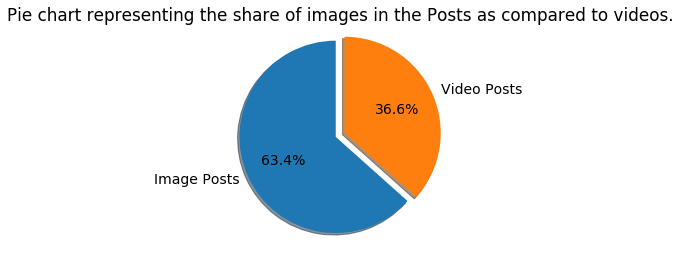

In [30]:
def videoPostsBJP():
  postTypeVideo=np.unique(postsBJP[:,6],return_counts=True)
  if postTypeVideo[0][0]=="True":
    labels="Video Posts","Image Posts"
    print("%d posts consisting of videos out of 1000 posts of BJP's official handle"%(postTypeVideo[1][0]))
  else:
    labels="Image Posts","Video Posts"
    print("%d posts consisting of videos out of 1000 posts of BJP's official handle"%(postTypeVideo[1][1]))
  
  sizes = postTypeVideo[1]
  explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
  plt.title("Pie chart representing the share of images in the Posts as compared to videos.")
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

videoPostsBJP()

## Part-2: 2-b

### Word Cloud of the top 200 most popular posts' descriptions (BJP)

words occur most frequently in BJP's instagram posts
PM, NarendraModi, Prime Minister, India, Temple, New Delhi, Election, Gujarat,National President, People, MAinBhiChowkidar 


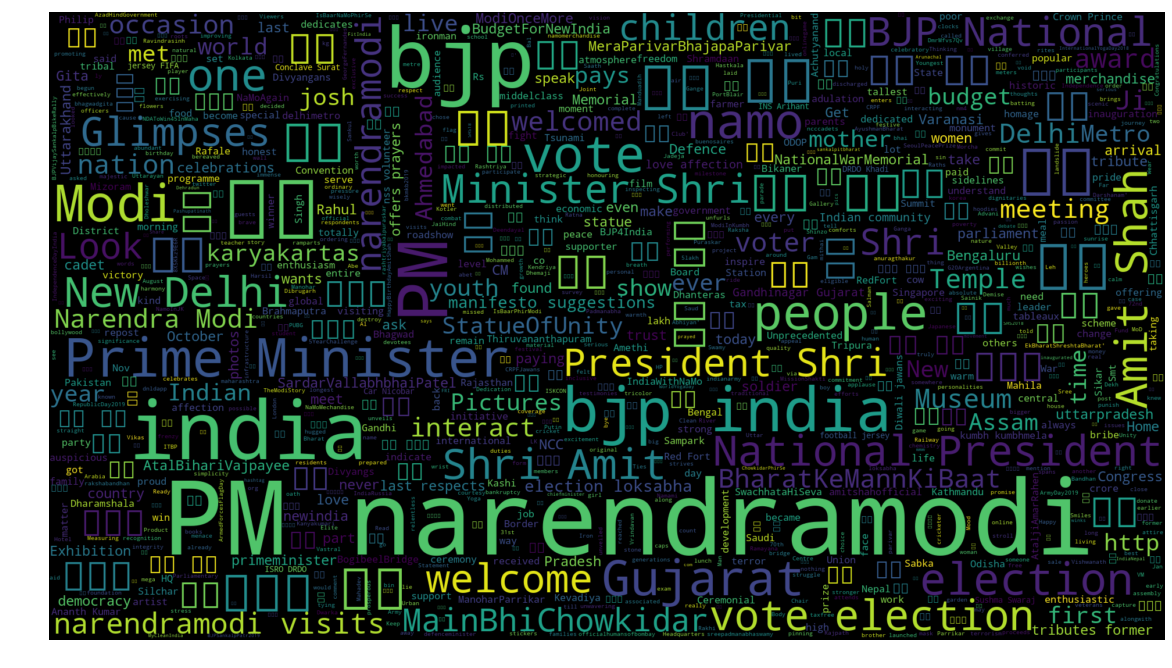

In [22]:
def popularPostsBJP():
  #giving more weightage to like than comment
  #popularity = 2*likes+comments
  popularity={}
  idVsPost={}
  for post in postsBJP:
    pid=post[1]
    like=post[3]
    comment=post[4]
    popularity[pid]=2*like+comment
    idVsPost[pid]=post
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pPostIdsVsPop=sorted_d[:200]
  para=""
  for pPost in pPostIdsVsPop:
    if isinstance(idVsPost[pPost[0]][2],str):
      para+=" "+idVsPost[pPost[0]][2]
    
  mask = np.array(Image.open("rab.jpg"))
  stopWords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","claim","claimed","however","Responsibility"]
  
  wordcloudSummary = WordCloud(mask=mask,max_words=1000,stopwords=stopWords).generate(para)   
  plt.figure(3,figsize=(20,20))
  plt.imshow(wordcloudSummary, interpolation="bilinear") 
  plt.axis("off") 
  plt.margins(x=0, y=0) 
  print("===========================================")
  print("words occur most frequently in BJP's instagram posts")
  print("===========================================")
  print("PM, NarendraModi, Prime Minister, India, Election, Gujarat,National President, People, MAinBhiChowkidar, Namo, Amit Shah, Vote ")
  plt.show()
  wordcloudSummary.to_file("popularInstaPostCloud.png")

  
popularPostsBJP()

## Part-2: 2-c
### 5 most used hashtags (BJP)

In [23]:
def frequent_HashTags_InstaBJP():
  allHashTags=[]
  for hashTag in postsBJP[:,5]:
    allHashTags+=ast.literal_eval(hashTag)
  hashTagsCount=np.unique(allHashTags,return_counts=True)
  sortedCount=np.argsort(-hashTagsCount[1])
  top5HashTags=hashTagsCount[0][sortedCount][:5]
  top5HashTagsCount=hashTagsCount[1][sortedCount][:5]
  print("=====================================================================")
  print("%40s | %4s"%("Hashtag","Frequency"))
  print("=====================================================================")
  for hashtag,count in zip(top5HashTags,top5HashTagsCount):
    print("%40s | %4d"%(hashtag,count))
frequent_HashTags_InstaBJP()

                                 Hashtag | Frequency
                                     bjp |   96
                                   india |   68
                                election |   39
                                    vote |   34
                      bharatkemannkibaat |   16


In [24]:
def exploreFeedDatasetInstagram(username,postsCount=3000):
  if path.exists('exploreFeeds-'+username+'.csv'):
    print('exploreFeeds-'+username+'.csv'+" file already exists")
    return
  L.interactive_login(username)
  print("Downloading instagram posts for %s. Check %s "%(username,'instaPosts'+username+'.csv'))
  csvFile = open('exploreFeeds-'+username+'.csv', 'w')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(["Date","ID", "Caption","Likes","Comments","ShortCode","Post-Type"])
  exploreFeedsGenerator = L.get_explore_posts()
  count=0
  for post in exploreFeedsGenerator:
    if count==postsCount:
      break
    csvWriter.writerow([post.date,post._full_metadata["id"], post.caption,post.likes,post.comments,post.shortcode,post.typename])
    count+=1
    print(count,end=" ")
  print()


In [25]:
username="thatsanuj"
exploreFeedDatasetInstagram(username)
exploreFeeds=pd.read_csv('exploreFeeds-'+username+'.csv').values
print("Explore Feeds: ",len(exploreFeeds))

exploreFeeds-thatsanuj.csv file already exists
Explore Feeds:  3000


## Part-3: 3-a

### 5 most popular posts (From user's feed)

In [31]:
def popularExploreFeeds():
  #giving more weightage to like than comment
  #popularity = 2*likes+comment
  popularity={}
  idVsPost={}
  for post in exploreFeeds:
    pid=post[1]
    like=post[3]
    comment=post[4]
    popularity[pid]=2*like+comment
    idVsPost[pid]=post
  sorted_d = sorted(popularity.items(), key=operator.itemgetter(1),reverse=True)
  pPostIdsVsPop=sorted_d[:5]
  print("5 most Popular Posts 'explore' Feed: ")
  i=1
  for pPost in pPostIdsVsPop:
    print("Post-",i," ###############################################################")
    printPost(idVsPost[pPost[0]],True)
    i+=1  
  
popularExploreFeeds()

5 most Popular Posts 'explore' Feed: 
Post- 1  ###############################################################
              Post ID:  2019260130415095877
              Post URL:  https://www.instagram.com/p/BwF2mPegDBF
              Post Text:  Happy to come back and score another goal in this amazing competition. Well done team! #finoallafine
              Post Likes:  6011489
              Post Comments:  43738
Post- 2  ###############################################################
              Post ID:  2016717092183950436
              Post URL:  https://www.instagram.com/p/Bv80YKkFURk
              Post Likes:  5841079
              Post Comments:  33697
Post- 3  ###############################################################
              Post ID:  2017521019272340101
              Post URL:  https://www.instagram.com/p/Bv_rK2AnKKF
              Post Text:  요워마고엘소엑
              Post Likes:  2653681
              Post Comments:  153731
Post- 4  ################################

## Part-3: 3-b

### pie chart comparing number of posts with just a single image/video in it, and number of posts with multiple images/videos in it (From user's feed)

Posts with single Image/Video:  2801
Posts with Muliple Images/Videos:  199


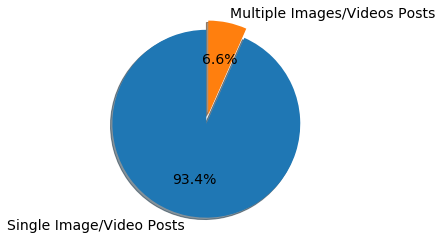

In [32]:
def comparSingleVsMulti():
  postTypes=np.unique(exploreFeeds[:,-1],return_counts=True)
  multiImageOrVideo=postTypes[1][postTypes[0]=="GraphSidecar"][0]
  singleImageOrVideo=3000-multiImageOrVideo
  labels="Single Image/Video Posts","Multiple Images/Videos Posts"
  print("Posts with single Image/Video: ",singleImageOrVideo)
  print("Posts with Muliple Images/Videos: ",multiImageOrVideo)
  sizes = singleImageOrVideo,multiImageOrVideo
  explode = (0, 0.1) 
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
  ax1.axis('equal') 

comparSingleVsMulti()